In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install transformers

     |████████████████████████████████| 675kB 6.9MB/s 
     |████████████████████████████████| 1.1MB 32.6MB/s 
     |████████████████████████████████| 3.8MB 40.6MB/s 
     |████████████████████████████████| 890kB 40.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=48d9ab7dc48220fc62a2045452a2addcafb8d05acedb6006aaf4fcec0105dba2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [0]:
from transformers import DistilBertPreTrainedModel, DistilBertModel
import torch.nn as nn

class MyDistilBertForSequenceClassification(DistilBertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.distilbert = DistilBertModel(config)
        self.pre_classifier = nn.Linear(config.dim, config.dim)
        self.classifier = nn.Linear(config.dim, 3)
        # self.classifier = nn.Linear(config.dim, config.num_labels)
        self.dropout = nn.Dropout(config.seq_classif_dropout)

        self.init_weights()

    def forward(self, input_ids=None, attention_mask=None, head_mask=None, inputs_embeds=None, labels=None):
        
        distilbert_output = self.distilbert(
            input_ids=input_ids, attention_mask=attention_mask, head_mask=head_mask, inputs_embeds=inputs_embeds
        )
        hidden_state = distilbert_output[0]  # (bs, seq_len, dim)
        pooled_output = hidden_state[:, 0]  # (bs, dim)
        pooled_output = self.pre_classifier(pooled_output)  # (bs, dim)
        pooled_output = nn.ReLU()(pooled_output)  # (bs, dim)
        pooled_output = self.dropout(pooled_output)  # (bs, dim)
        logits = self.classifier(pooled_output)  # (bs, dim)
        # new addition jordan
        # logits = nn.ReLU()(logits)
        outputs = (logits,) + distilbert_output[1:]
        if labels is not None:
            if self.num_labels == 1:
                loss_fct = nn.MSELoss()
                loss = loss_fct(logits.view(-1, 3), labels.view(-1, 3))
            else:
                loss_fct = nn.CrossEntropyLoss()
                loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            outputs = (loss,) + outputs

        return outputs  # (loss), logits, (hidden_states), (attentions)


In [0]:
# from transformers import AlbertPreTrainedModel, AlbertModel
# import torch.nn as nn
# class MyAlbertForSequenceClassification(AlbertPreTrainedModel):
#     def __init__(self, config):
#         super().__init__(config)
#         self.num_labels = config.num_labels

#         self.albert = AlbertModel(config)
#         self.dropout = nn.Dropout(config.classifier_dropout_prob)
#         self.classifier = nn.Linear(config.hidden_size, 3)
#         self.init_weights()

#     def forward(
#         self,
#         input_ids=None,
#         attention_mask=None,
#         token_type_ids=None,
#         position_ids=None,
#         head_mask=None,
#         inputs_embeds=None,
#         labels=None,
#     ):

#         outputs = self.albert(
#             input_ids=input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids,
#             position_ids=position_ids,
#             head_mask=head_mask,
#             inputs_embeds=inputs_embeds,
#         )

#         pooled_output = outputs[1]

#         pooled_output = self.dropout(pooled_output)
#         logits = self.classifier(pooled_output)

#         outputs = (logits,) + outputs[2:]  # add hidden states and attention if they are here

#         if labels is not None:
#             if self.num_labels == 1:
#                 loss_fct = nn.MSELoss()
#                 # loss_fct = nn.CrossEntropyLoss()
#                 loss = loss_fct(logits.view(-1, 3), labels.view(-1, 3))
#             else:
#                 loss_fct = nn.CrossEntropyLoss()
#                 loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
#             outputs = (loss,) + outputs

#         return outputs  # (loss), logits, (hidden_states), (attentions)



In [0]:
# from transformers import BertPreTrainedModel, BertModel

# class MyBertForSequenceClassification(BertPreTrainedModel):
#     def __init__(self, config):
#         super().__init__(config)
#         self.num_labels = config.num_labels

#         self.bert = BertModel(config)
#         self.dropout = nn.Dropout(config.hidden_dropout_prob)
#         self.classifier = nn.Linear(config.hidden_size, 5)

#         self.init_weights()

#     def forward(
#         self,
#         input_ids=None,
#         attention_mask=None,
#         token_type_ids=None,
#         position_ids=None,
#         head_mask=None,
#         inputs_embeds=None,
#         labels=None,
#     ):
        
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids,
#             position_ids=position_ids,
#             head_mask=head_mask,
#             inputs_embeds=inputs_embeds,
#         )

#         pooled_output = outputs[1]

#         pooled_output = self.dropout(pooled_output)
#         logits = self.classifier(pooled_output)

#         outputs = (logits,) + outputs[2:]  # add hidden states and attention if they are here
#         if labels is not None:
#             if self.num_labels == 1:
#                 loss_fct = nn.MSELoss()
#                 loss = loss_fct(logits.view(-1, 5), labels.view(-1, 5))
#             else:
#                 loss_fct = nn.CrossEntropyLoss()
#                 loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
#             outputs = (loss,) + outputs

#         return outputs  # (loss), logits, (hidden_states), (attentions)


In [0]:
# from transformers import BertPreTrainedModel, BertModel, RobertaConfig, RobertaModel
# class MyRobertaClassificationHead(nn.Module):
#     """Head for sentence-level classification tasks."""

#     def __init__(self, config):
#         super().__init__()
#         self.dense = nn.Linear(config.hidden_size, config.hidden_size)
#         self.dropout = nn.Dropout(config.hidden_dropout_prob)
#         self.out_proj = nn.Linear(config.hidden_size, 3)

#     def forward(self, features, **kwargs):
#         x = features[:, 0, :]  # take <s> token (equiv. to [CLS])
#         x = self.dropout(x)
#         x = self.dense(x)
#         x = torch.tanh(x)
#         x = self.dropout(x)
#         x = self.out_proj(x)
#         return x

# class MyRobertaForSequenceClassification(BertPreTrainedModel):
#     config_class = RobertaConfig
#     base_model_prefix = "roberta"

#     def __init__(self, config):
#         super().__init__(config)
#         self.num_labels = config.num_labels

#         self.roberta = RobertaModel(config)
#         self.classifier = MyRobertaClassificationHead(config)

#     def forward(
#         self,
#         input_ids=None,
#         attention_mask=None,
#         token_type_ids=None,
#         position_ids=None,
#         head_mask=None,
#         inputs_embeds=None,
#         labels=None,
#     ):
#         outputs = self.roberta(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids,
#             position_ids=position_ids,
#             head_mask=head_mask,
#             inputs_embeds=inputs_embeds,
#         )
#         sequence_output = outputs[0]
#         logits = self.classifier(sequence_output)

#         outputs = (logits,) + outputs[2:]  # add hidden states and attention if they are here
#         if labels is not None:
#             if self.num_labels == 1:
#                 loss_fct = nn.MSELoss()
#                 loss = loss_fct(logits.view(-1, 3), labels.view(-1, 3))
#             else:
#                 loss_fct = nn.CrossEntropyLoss()
#                 loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
#             outputs = (loss,) + outputs

#         return outputs  # (loss), logits, (hidden_states), (attentions)

In [9]:
from transformers import AlbertForSequenceClassification, AdamW, BertConfig, DistilBertForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = MyDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    # num_labels = 5, # The number of output labels--2 for binary classification.
    num_labels = 1, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

MyDistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
     

In [0]:
import torch

if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


# Data

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/jordanchtan/EvaluationData/master/ReactData/2_No_Likes.csv'
# url = 'https://raw.githubusercontent.com/jordanchtan/EvaluationData/master/ReactData/8_No_Likes_min_100.csv'
# url = 'https://raw.githubusercontent.com/jordanchtan/EvaluationData/master/ReactDataCountsPre/2_No_Likes.csv'
df = pd.read_csv(url, encoding='utf16')

n = 1
df = df.head(int(len(df)*(n/100)))

data = df['name']

data = data.values
labels = df.select_dtypes(include=[np.number])

labels = labels.values
# labels = labels/labels.sum(axis=1, keepdims=True)

sentences, sentences_holdout, labels, labels_holdout = train_test_split(data, labels, test_size=0.001, shuffle=True)

In [0]:
print(sentences[0])
print(labels[0])
print(sentences.shape)
print(labels.shape)
print(sentences_holdout[:3])
print(labels_holdout[:3])
print(sentences_holdout.shape)
print(labels_holdout.shape)

# np.save('./sentences_holdout.npy', sentences_holdout,allow_pickle=True)
# np.save('./labels_holdout.npy', labels_holdout,allow_pickle=True)

# !cp sentences_holdout.npy "./drive/My Drive/Colab Notebooks/MainModels"
# !cp labels_holdout.npy "./drive/My Drive/Colab Notebooks/MainModels"

Woman Makes 29-Gallon Breast Milk Donation
[1. 0. 0. 0. 0.]
(1554,)
(1554, 5)
['How bad are most of India’s medical schools? Very, according to new reports.'
 "Ivanka Trump's brand will survive election no matter who wins, experts say"]
[[0.02857143 0.51428571 0.05714286 0.28571429 0.11428571]
 [0.12173913 0.05217391 0.32173913 0.02608696 0.47826087]]
(2,)
(2, 5)


In [0]:
from transformers import BertTokenizer, DistilBertTokenizer, RobertaTokenizer,AlbertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
# or cased?
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [0]:
max_len = 0
# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

for sent in sentences_holdout:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  35


In [0]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = "pt",     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Woman Makes 29-Gallon Breast Milk Donation
Token IDs: tensor([    0,   693,   817,  1132,    12, 30322,   261,  6181,  5803,  7096,
            2,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1])


In [0]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.90 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

1,398 training samples
  156 validation samples


In [0]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [0]:
from transformers import BertForSequenceClassification, AdamW, BertConfig, DistilBertForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = MyBertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    # num_labels = 5, # The number of output labels--2 for binary classification.
    num_labels = 1, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

MyBertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, eleme

In [0]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 203 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (50265, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias           (

In [0]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )


In [0]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 2

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [0]:
import numpy as np
import sklearn

def flat_mse(preds, labels):
    pred_flat = preds.flatten()
    labels_flat = labels.flatten()
    # result = (np.square(preds - labels)).mean(axis=None)
    result = sklearn.metrics.mean_squared_error(labels, preds)
    return result


import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

from scipy.spatial.distance import jensenshannon

def my_js_dist(list_p, list_q):
  list_p = np.abs(np.concatenate(list_p))
  list_q = np.abs(np.concatenate(list_q))

  result = 0
  for index, p in enumerate(list_p):
    q = list_q[index]
    result += jensenshannon(p, q, base=2)
  
  return result / len(list_p)

# Training

In [0]:
import random
import numpy as np

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

model.double()
# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                            #  token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    predictions , true_labels = [], []

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                  #  token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        acc = flat_mse(logits, label_ids)
        total_eval_accuracy += acc

        # Store predictions and true labels
        predictions.append(logits)
        true_labels.append(label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    avg_val_mse = sklearn.metrics.mean_squared_error(np.concatenate(true_labels).ravel(), np.concatenate(predictions).ravel())
    avg_val_mae = sklearn.metrics.mean_absolute_error(np.concatenate(true_labels).ravel(), np.concatenate(predictions).ravel())
    avg_val_js_dist = my_js_dist(true_labels, predictions)
    print("  Accuracy (mse): ", avg_val_accuracy)
    print("mse: ", avg_val_mse)
    print("mae: ", avg_val_mae)
    print("js dist: ", avg_val_js_dist)

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur (mse).': avg_val_accuracy,
            'Valid. MSE.': avg_val_mse,
            'Valid. MAE.': avg_val_mae,
            'Valid. JS Dist.': avg_val_js_dist,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch    40  of     44.    Elapsed: 0:00:09.

  Average training loss: 0.08
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy (mse):  0.07439448693218302
mse:  0.07438176454568986
mae:  0.20682908089167945
js dist:  0.544336417402432
  Validation Loss: 0.07
  Validation took: 0:00:00

======== Epoch 2 / 2 ========
Training...
  Batch    40  of     44.    Elapsed: 0:00:09.

  Average training loss: 0.07
  Training epcoh took: 0:00:10

Running Validation...
  Accuracy (mse):  0.06582456337672318
mse:  0.06587576727356818
mae:  0.1924993417591356
js dist:  0.5056978510269803
  Validation Loss: 0.07
  Validation took: 0:00:00

Training complete!
Total training took 0:00:21 (h:mm:ss)


In [0]:
# albert 0.07169099909003908
# distil 0.06872943142467139
# bert 0.06897136609064486
# roberta 0.06587576727356818
print(len(true_labels))
print(len(predictions))

5
5


In [0]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Valid. Accur (mse).,Valid. MSE.,Valid. MAE.,Valid. JS Dist.,Training Time,Validation Time
epoch,,,,,,,,
1,0.08,0.07,0.07,0.07,0.19,0.51,0:00:10,0:00:00
2,0.07,0.06,0.06,0.06,0.19,0.49,0:00:10,0:00:00


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


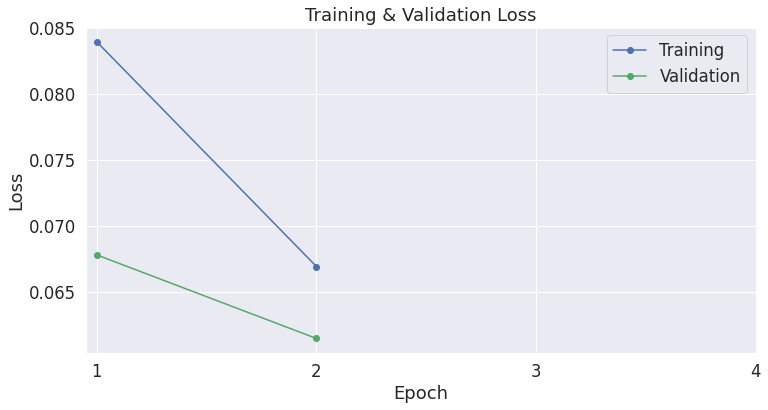

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

# Testing

In [0]:
import pandas as pd

# Load the dataset into a pandas dataframe.
sentences = sentences_holdout
labels = labels_holdout

# Report the number of sentences.
print('Number of test sentences:', sentences_holdout.shape)

# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Set the batch size.  
batch_size = 32

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Number of test sentences: (2,)


In [0]:
# Prediction on test set

print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, 
                      # token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

In [0]:
print(true_labels[0])

In [0]:
print(len(validation_dataloader))
print('MSE:', sklearn.metrics.mean_squared_error(np.concatenate(true_labels).ravel(), np.concatenate(predictions).ravel()))
print('MAE:', sklearn.metrics.mean_absolute_error(np.concatenate(true_labels).ravel(), np.concatenate(predictions).ravel()))
print('JS Dist:', my_js_dist(true_labels, predictions))

# Save

In [0]:
import os

# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = './react_base_model/'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


In [0]:
!cp -r ./react_base_model/ "./drive/My Drive/Colab Notebooks/MainModels"


In [0]:
# # Load a trained model and vocabulary that you have fine-tuned
# model = model_class.from_pretrained(output_dir)
# tokenizer = tokenizer_class.from_pretrained(output_dir)

# # Copy the model to the GPU.
# model.to(device)